<a href="https://colab.research.google.com/github/KamilShape/credit_risk_analysis/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction and data load.

###1.1 Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1.2 Database analysis

Database link: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset

In [3]:
loan = pd.read_csv("/content/drive/MyDrive/loan.csv")

<ipython-input-3-09ca7cbc1256>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("/content/drive/MyDrive/loan.csv")


In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data preprocessing

### 2.1 Selecting relevant columns

In [5]:
loan2 = loan[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'home_ownership', 'emp_length', 'annual_inc', 'purpose', 'dti', 'delinq_2yrs', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status', 'loan_status']]

In [6]:
loan2

,loan_amnt,term,int_rate,installment,grade,home_ownership,emp_length,annual_inc,purpose,dti,delinq_2yrs,application_type,annual_inc_joint,dti_joint,verification_status,loan_status
0,5000.0,36 months,10.65,162.87,B,RENT,10+ years,24000.0,credit_card,27.65,0.0,INDIVIDUAL,NaN,NaN,Verified,Fully Paid
1,2500.0,60 months,15.27,59.83,C,RENT,< 1 year,30000.0,car,1.00,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Charged Off
2,2400.0,36 months,15.96,84.33,C,RENT,10+ years,12252.0,small_business,8.72,0.0,INDIVIDUAL,NaN,NaN,Not Verified,Fully Paid
3,10000.0,36 months,13.49,339.31,C,RENT,10+ years,49200.0,other,20.00,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Fully Paid
4,3000.0,60 months,12.69,67.79,B,RENT,1 year,80000.0,other,17.94,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,36 months,11.99,332.10,B,RENT,8 years,31000.0,debt_consolidation,28.69,0.0,INDIVIDUAL,NaN,NaN,Verified,Current
887375,24000.0,36 months,11.99,797.03,B,MORTGAGE,10+ years,79000.0,home_improvement,3.90,0.0,INDIVIDUAL,NaN,NaN,Verified,Current
887376,13000.0,60 months,15.99,316.07,D,RENT,5 years,35000.0,debt_consolidation,30.90,0.0,INDIVIDUAL,NaN,NaN,Verified,Current
887377,12000.0,60 months,19.99,317.86,E,RENT,1 year,64400.0,debt_consolidation,27.19,1.0,INDIVIDUAL,NaN,NaN,Source Verified,Current


### 2.2 Removing NaN values

In [7]:
loan2.fillna(0, inplace = True)

<ipython-input-7-81e18bd3abfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2.fillna(0, inplace = True)


In [8]:
#checking null values
np.sum(loan2.isnull().any(axis=1))

0

### 2.3 Spliting loan_status into 3 categories
* 1 - low risk (Issued, Current, Does not meet the credit policy: Status:Fully Paid, Fully Paid)
* 2 - medium risk (In Grace Period, Late (16-30 days), Late (31-120 days))
* 3 - high risk (Charged Off ,Does not meet the credit policy. Status:Charged Off, Default)






In [9]:
loan2.loc[loan2['loan_status'].isin(['Issued','Current','Does not meet the credit policy. Status:Fully Paid', 'Fully Paid']), 'loan_risk'] = 'Low'
loan2.loc[loan2['loan_status'].isin(['In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']), 'loan_risk'] = 'Medium'
loan2.loc[loan2['loan_status'].isin(['Charged Off' , 'Does not meet the credit policy. Status:Charged Off', 'Default']), 'loan_risk'] = 'High'

<ipython-input-9-8fe3149f6cc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2.loc[loan2['loan_status'].isin(['Issued','Current','Does not meet the credit policy. Status:Fully Paid', 'Fully Paid']), 'loan_risk'] = 'Low'


#3. Data visualisation

### 3.1 Data Visualisation for loan risk

In [ ]:
avg_loan_amnt_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['loan_amnt'].mean().reset_index())

In [25]:
avg_rate_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['int_rate'].mean().reset_index())

In [12]:
avg_dti_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['dti'].mean().reset_index())

In [13]:
avg_installment_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['installment'].mean().reset_index())

In [ ]:
#cleaning emp_length columns
loan2['emp_length'] = loan2['emp_length'].str.replace('year', "")
loan2['emp_length'] = loan2['emp_length'].str.replace('s', "")
loan2['emp_length'] = loan2['emp_length'].str.replace('< 1', "0.5")
loan2['emp_length'] = loan2['emp_length'].str.replace('+', "")
loan2['emp_length'] = loan2['emp_length'].str.replace(' ', "")
loan2['emp_length'] = loan2['emp_length'].astype('float')

In [15]:
avg_emp_length_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['emp_length'].mean().reset_index())

In [16]:
avg_emp_length_by_loan_risk['emp_length'] = avg_emp_length_by_loan_risk['emp_length'].round()

In [55]:
avg_annual_inc_by_loan_risk = pd.DataFrame(loan2.groupby('loan_risk')['annual_inc'].mean().reset_index())

In [ ]:
avg_annual_inc_by_loan_risk

In [58]:
graph_data = pd.merge(pd.merge(avg_loan_amnt_by_loan_risk, avg_rate_by_loan_risk,  on='loan_risk'), avg_dti_by_loan_risk,  on='loan_risk',  how='inner')

In [59]:
graph_data = pd.merge(pd.merge(graph_data, avg_installment_by_loan_risk, on='loan_risk'), avg_emp_length_by_loan_risk, on='loan_risk', how='inner')

In [64]:
graph_data = graph_data.merge(avg_annual_inc_by_loan_risk, on = 'loan_risk')

In [65]:
graph_data['order'] = [2,0,1]

In [66]:
graph_data.sort_values(by = 'order', inplace=True)

In [113]:
graph_data

,loan_risk,loan_amnt,int_rate,dti,installment,emp_length,annual_inc,order
1,Low,14746.769651,13.026273,18.107932,435.728070,6.0,75660.675169,0
2,Medium,15716.226919,15.767458,19.633281,471.798507,6.0,72292.485413,1
0,High,14491.714131,15.996180,18.378162,438.883186,6.0,65199.766809,2


In [19]:
#loan_int_range_df = pd.DataFrame(loan2['int_range'].value_counts()).reset_index().sort_values(by='index')

In [20]:
#Interest Rate on the loan
# ax[0,0].bar(loan_int_range_df['index'], loan_int_range_df['int_range'], color='lightsalmon')
# ax[0,0].set_title('Interest Rate on the loan (Min value: 5.32%, Max value: 28.99%)')
# ax[0,0].set_xlabel('Rates range [%]')

In [ ]:
loan2['int_range'] = pd.cut(loan2['int_rate'], bins = [5,10.01,14.01,18.01,22.01,26.01,29.01], labels = ['5-10','10-14','14-18','18-22','22-26','26-29'])

In [215]:
#graph functions
def graph_draw(ax, x, y, color, title, ylabel):
  ax.bar(x, y, color=color, width=0.6)
  ax.set_title(title)
  ax.set_ylabel(ylabel)

def add_text(chart, x, y, move_y, angle, move_x = 0,):
  for i in range(0, len(x)):
    x_value = x[i]
    if type(x[i]) != str:
      x_value = x[i] + move_x
    chart.text(x_value, y[i]-move_y, round(y[i], 2), horizontalalignment='center', rotation=angle)

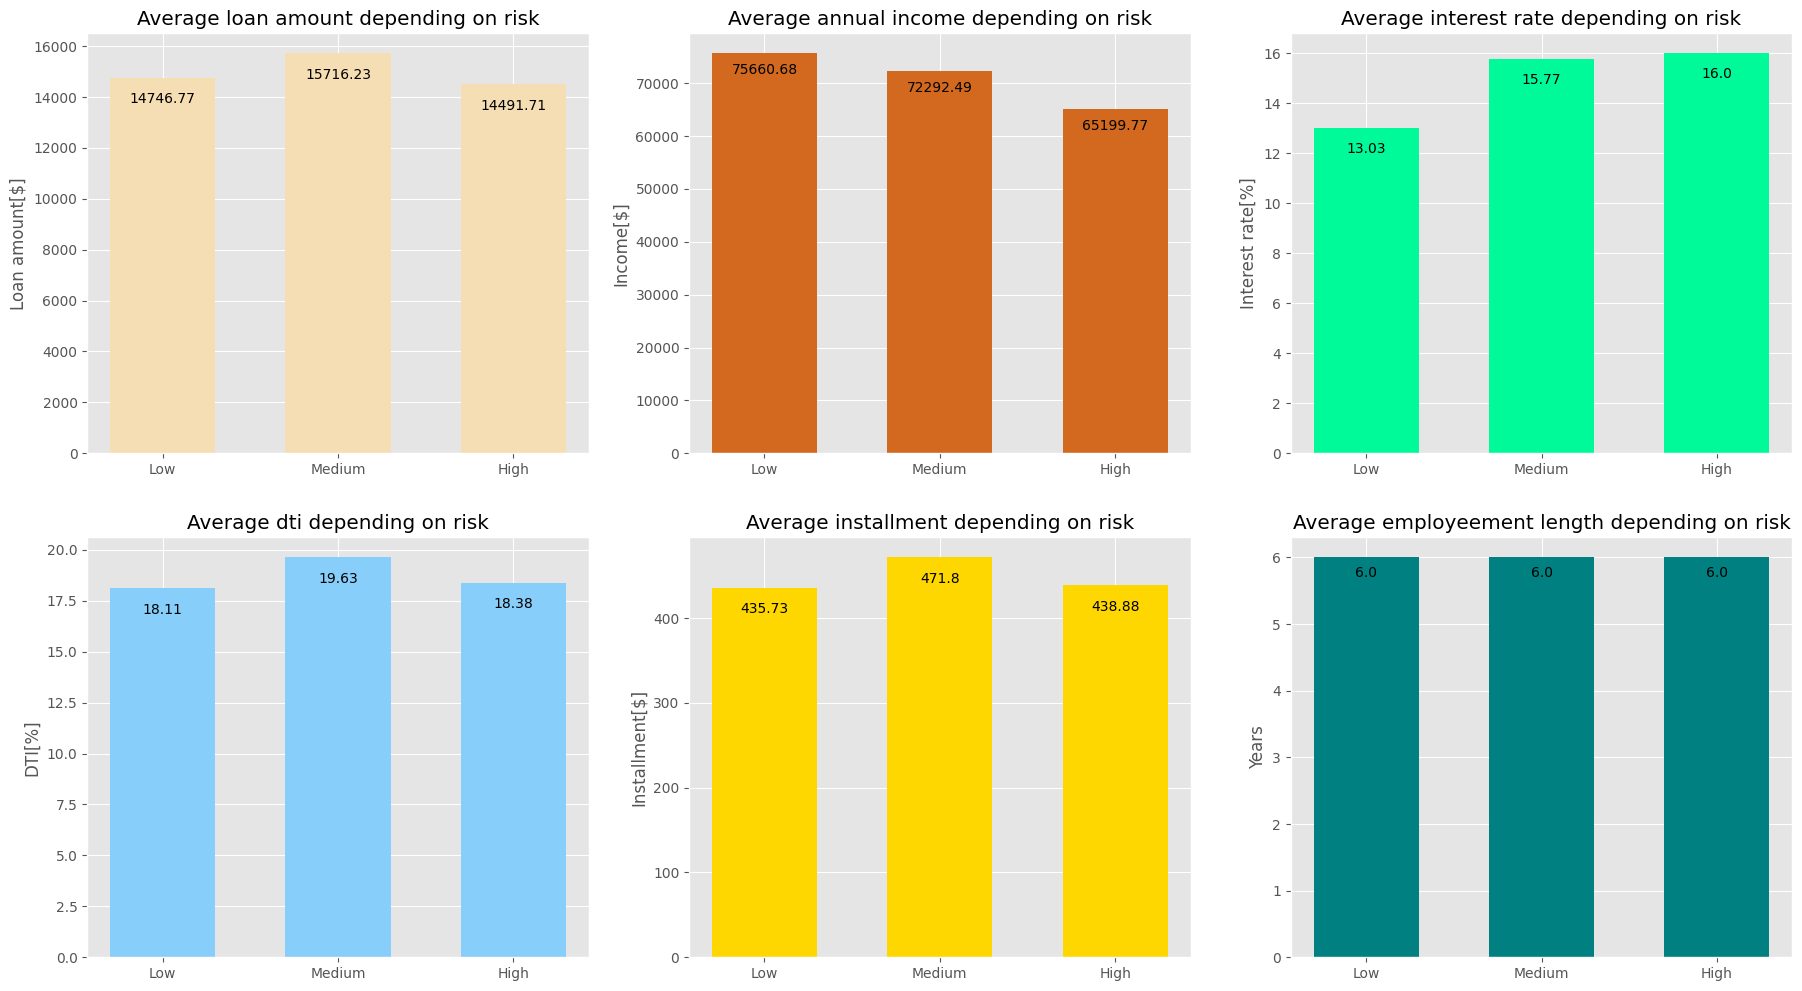

In [228]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,3, figsize = (22,12))

graph_draw(ax[0,0], graph_data['loan_risk'], graph_data['loan_amnt'], 'wheat', 'Average loan amount depending on risk', 'Loan amount[$]')
graph_draw(ax[0,1], graph_data['loan_risk'], graph_data['annual_inc'], 'chocolate', 'Average annual income depending on risk', 'Income[$]')
graph_draw(ax[0,2], graph_data['loan_risk'], graph_data['int_rate'], 'mediumspringgreen', 'Average interest rate depending on risk', 'Interest rate[%]')
graph_draw(ax[1,0], graph_data['loan_risk'], graph_data['dti'], 'lightskyblue', 'Average dti depending on risk', 'DTI[%]')
graph_draw(ax[1,1], graph_data['loan_risk'], graph_data['installment'], 'gold', 'Average installment depending on risk', 'Installment[$]' )
graph_draw(ax[1,2], graph_data['loan_risk'], graph_data['emp_length'], 'teal', 'Average employeement length depending on risk', 'Years')

add_text(ax[0,0], graph_data['loan_risk'], graph_data['loan_amnt'], 1000, 0)
add_text(ax[0,1], graph_data['loan_risk'], graph_data['annual_inc'], 4000, 0)
add_text(ax[0,2], graph_data['loan_risk'], graph_data['int_rate'], 1, 0)
add_text(ax[1,0], graph_data['loan_risk'], graph_data['dti'], 1.25, 0)
add_text(ax[1,1], graph_data['loan_risk'], graph_data['installment'], 30, 0)
add_text(ax[1,2], graph_data['loan_risk'], graph_data['emp_length'], 0.3, 0)

In [98]:
#term values by loan term
months_36 = loan2[loan2['term'] == ' 36 months']
months_60 = loan2[loan2['term'] == ' 60 months']

In [91]:
#counting values by loan term
ver = loan2[loan2['verification_status'] == 'Verified']
source_ver = loan2[loan2['verification_status'] == 'Source Verified']
not_ver = loan2[loan2['verification_status'] == 'Not Verified']

<ipython-input-234-a780ed51982c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([' ',' ','Low',' ','Medium',' ','High'])
<ipython-input-234-a780ed51982c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([' ','  ','Low',' ','Medium',' ','High'])


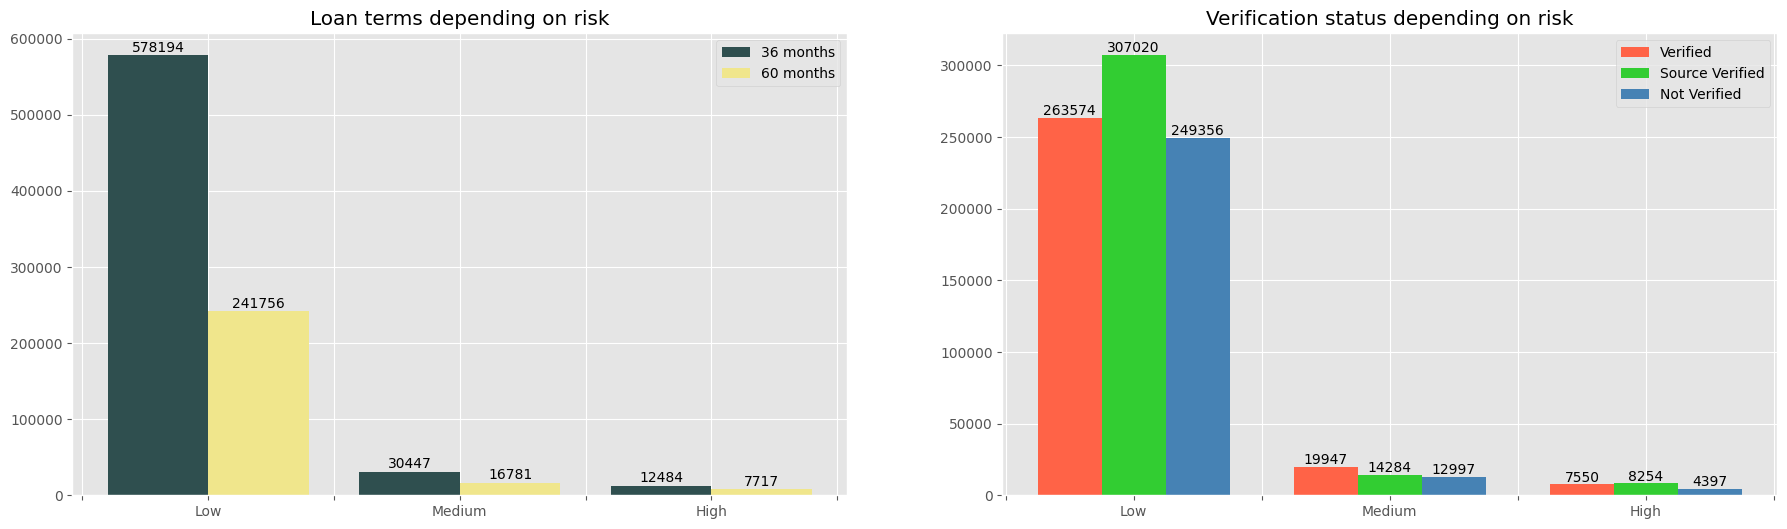

In [234]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1,2, figsize = (22,6))
X = ['Low', 'Medium', 'High']
X_axis = np.arange(len(X))

#Terms depending on risk
ax[0].bar(X_axis-0.2,months_36['loan_risk'].value_counts().values,0.4,label= '36 months', color='darkslategray')
ax[0].bar(X_axis+0.2,months_60['loan_risk'].value_counts().values,0.4,label= '60 months', color='khaki')
ax[0].set_title('Loan terms depending on risk')
ax[0].set_xticklabels([' ',' ','Low',' ','Medium',' ','High'])
ax[0].legend()

#Verification status depending on risk
ax[1].bar(X_axis-0.25,ver['loan_risk'].value_counts().values,0.25,label= 'Verified', color='tomato')
ax[1].bar(X_axis,source_ver['loan_risk'].value_counts().values,0.25,label= 'Source Verified', color='limegreen')
ax[1].bar(X_axis+0.25,not_ver['loan_risk'].value_counts().values,0.25,label= 'Not Verified', color='steelblue')
ax[1].set_title('Verification status depending on risk')
ax[1].set_xticklabels([' ','  ','Low',' ','Medium',' ','High'])
ax[1].legend()

#text
add_text(ax[0], X_axis , months_36['loan_risk'].value_counts().values, -5000, 0, move_x = -0.2)
add_text(ax[0], X_axis , months_60['loan_risk'].value_counts().values, -5000, 0, move_x = 0.2)
add_text(ax[1], X_axis , ver['loan_risk'].value_counts().values, -2000, 0, move_x = -0.25)
add_text(ax[1], X_axis , source_ver['loan_risk'].value_counts().values, -2000, 0, move_x = 0.0)
add_text(ax[1], X_axis , not_ver['loan_risk'].value_counts().values, -2000, 0, move_x = 0.25)